#### POLYNOMIAL REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

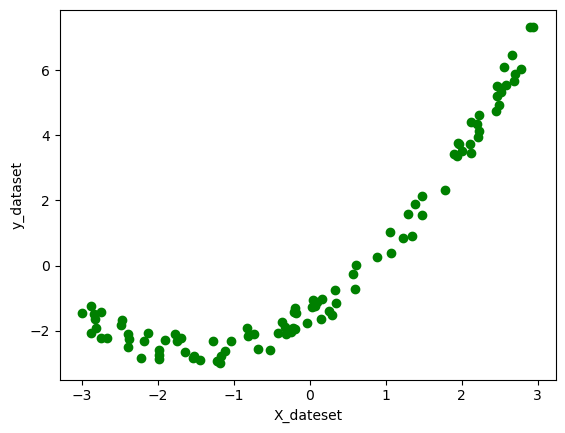

In [3]:
X = 6 * np.random.rand(100,1)  - 3                    # basic equation with an outlier
y = 0.5 * X**2 + 1.5*X -2 + np.random.rand(100,1)     # quad equation used: y = 0.5x^2 + 1.5x + 2 + outliers

plt.scatter(X,y,color = 'g')
plt.xlabel("X_dateset")
plt.ylabel('y_dataset')
plt.show()

#### Explanation:
	• np.random.rand(100, 1) → Creates 100 random numbers between 0 and 1 in a column format.
	• * 6 - 3 → Scales them to be between -3 and 3.
	• y = 0.5 * X**2 + X + 2 → This is your “hidden” equation (a quadratic curve).
	• + np.random.randn(100, 1) → Adds some noise (random error), making it realistic like real-world data which is never perfect.

Analogy: Imagine you throw darts at a board shaped like a curve — some darts hit exactly on the curve, some are a little off.

Why: You’re simulating a real dataset that follows a curved relationship.


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Implement Simple linear regression

In [5]:
from sklearn.linear_model import LinearRegression

reg_1 = LinearRegression()



In [6]:
# Train (fit) your model

reg_1.fit(X_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score

score = r2_score(y_test,reg_1.predict(X_test))
print(score)

0.6941557261980962


R2 Score is not very good, means y_pred results only matches 69 percent for the original y_test results.

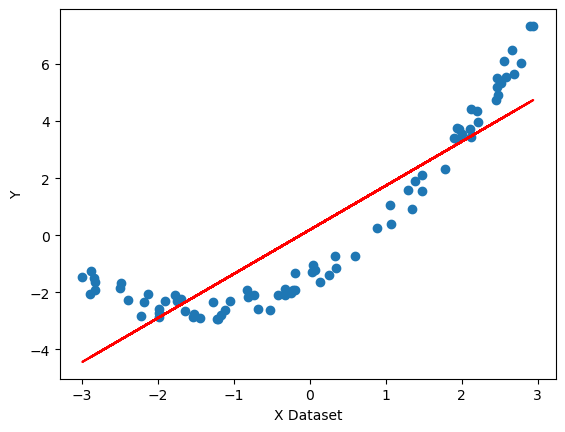

In [8]:
# visualize the model

plt.plot(X_train,reg_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y')
plt.show()

Lets implement Polynomial Features

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### Explanation:
	• PolynomialFeatures(degree=2) → Tells sklearn: “Add curved features up to x²”.
	• include_bias=True → You want an extra column of all 1s because your regression model will add it.
	• fit_transform(X) → Learns how to expand X into [X, X²] and then does it.

Analogy: If X was a person, PolynomialFeatures makes a clone and dresses it differently — one in original clothes (X), the other in squared clothes (X²).

Why: Linear regression can only learn straight lines; by adding squared terms, we let it learn curves.

In [10]:
X_test_poly

array([[ 1.00000000e+00, -1.18041177e+00,  1.39337194e+00],
       [ 1.00000000e+00,  5.67681814e-01,  3.22262642e-01],
       [ 1.00000000e+00,  6.05160769e-01,  3.66219556e-01],
       [ 1.00000000e+00,  2.85099887e-01,  8.12819458e-02],
       [ 1.00000000e+00,  9.04154463e-02,  8.17495293e-03],
       [ 1.00000000e+00,  2.70039992e+00,  7.29215974e+00],
       [ 1.00000000e+00, -2.39209986e+00,  5.72214174e+00],
       [ 1.00000000e+00, -2.02611429e-01,  4.10513913e-02],
       [ 1.00000000e+00, -3.61567739e-01,  1.30731230e-01],
       [ 1.00000000e+00, -2.74253192e+00,  7.52148135e+00],
       [ 1.00000000e+00, -3.80091103e-02,  1.44469247e-03],
       [ 1.00000000e+00,  1.22256530e+00,  1.49466591e+00],
       [ 1.00000000e+00, -2.39951052e+00,  5.75765074e+00],
       [ 1.00000000e+00, -2.75029608e+00,  7.56412852e+00],
       [ 1.00000000e+00,  2.22990284e+00,  4.97246666e+00],
       [ 1.00000000e+00,  2.51037422e+00,  6.30197875e+00],
       [ 1.00000000e+00,  1.62703389e-01

In [11]:
from sklearn.linear_model import LinearRegression

reg_2 = LinearRegression()

# Train (fit) your model

reg_2.fit(X_train_poly,y_train)          # Fits the model to your training data (X_train_poly as features, y_train as target)

from sklearn.metrics import r2_score

y_pred = reg_2.predict(X_test_poly)        # Uses the trained model to predict values for the test set.

score = r2_score(y_test,y_pred)         # Compares predicted values (y_pred) to actual test values (y_test) and returns the R² score.
print(score)


0.9869418649310473


The R2 Score has improved, so our model is trained well


- R² = 1: Perfect prediction
- R² = 0: Model is no better than guessing the mean
- Negative R²: Model is worse than just guessing

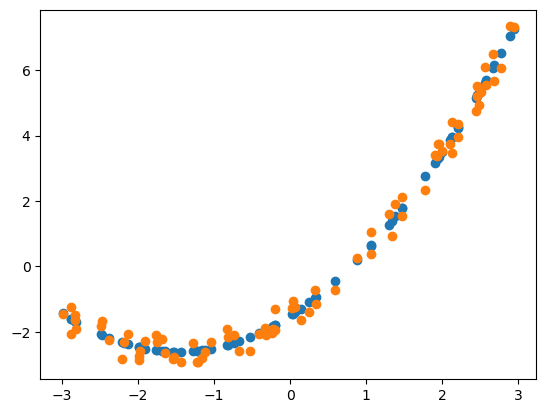

In [12]:
plt.scatter(X_train,reg_2.predict(X_train_poly))
plt.scatter(X_train,y_train)

plt.show()

In [13]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [14]:
# Prediction of new data

X_new = np.linspace(-3,3,200).reshape(200,1)

X_new_poly = poly.transform(X_new)

X_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

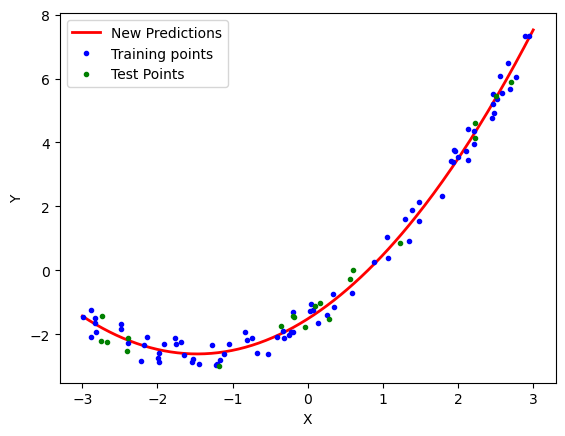

In [15]:
y_new = reg_2.predict(X_new_poly)
plt.plot(X_new,y_new,'r',linewidth=2,label='New Predictions')
plt.plot(X_train,y_train,'b.',label="Training points")
plt.plot(X_test,y_test,'g.',label='Test Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### Pipelining

In [16]:
from sklearn.pipeline import Pipeline

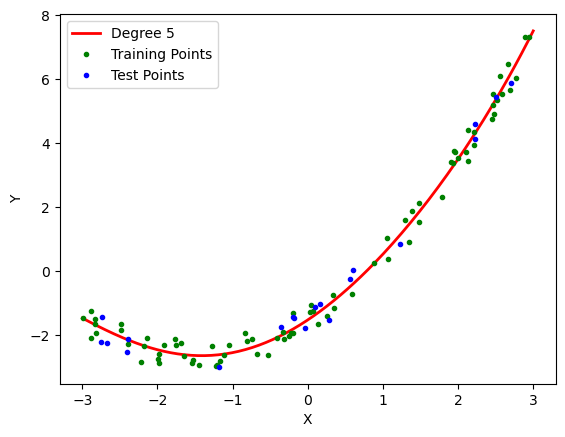

In [19]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree=degree,include_bias=True)

    lin_reg = LinearRegression()

    poly_reg = Pipeline([('poly_feaures',poly_features),('lin_reg',lin_reg)])

    poly_reg.fit(X_train,y_train) 
    y_pred_new = poly_reg.predict(X_new)

    # plotting the line

    plt.plot(X_new,y_pred_new,'r',label='Degree ' + str(degree),linewidth=2)
    plt.plot(X_train,y_train,'g.',label='Training Points',linewidth=3)
    plt.plot(X_test,y_test,'b.',label='Test Points',linewidth=3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.show()

poly_regression(5)  

